In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
from scipy.stats import skew

from statsmodels.stats.outliers_influence import variance_inflation_factor 
import statsmodels.api as sm

#Model Building
from xgboost import plot_tree
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,RobustScaler,LabelEncoder,PowerTransformer
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import xgboost as xgb
import lightgbm as lgb
from sklearn.feature_selection import SelectKBest
from sklearn.inspection import permutation_importance


/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, KFold,GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,classification_report
from sklearn.preprocessing import StandardScaler,RobustScaler,LabelEncoder,PowerTransformer
from sklearn.ensemble import GradientBoostingRegressor,StackingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.model_selection import KFold, cross_val_score,  train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA




In [3]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows',150)

# Lets import the data 

In [4]:
train= pd.read_csv('data /train_4.csv',index_col=0)

In [5]:
train = train.drop(['Unnamed: 0.1'],axis=1)

In [6]:
test = pd.read_csv('data /test_4.csv',index_col=0)

In [7]:
test= test.drop(['Unnamed: 0.1'],axis=1)

In [8]:
test

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,TotalSF,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,...,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_150
0,1461,4.394449,9.360741,5,1961,1961,0.000000,6.150603,4.976734,5.602119,6.783325,0.000000,0.0,6.799056,0.000000,0.000000,1,0.000000,2,0.693147,0.000000,1961.0,1.0,4.948760,0.000000,0.0,0.0,4.795791,0.0,0.000000,0,7.483807,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,1462,4.406719,9.565775,6,1958,1958,4.691348,6.828712,0.000000,6.008813,7.192934,0.000000,0.0,7.192934,0.000000,0.000000,1,0.693147,3,0.693147,0.000000,1958.0,1.0,5.976351,3.610918,0.0,0.0,0.000000,0.0,9.433564,0,7.885705,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,1463,4.317488,9.534668,5,1997,1998,0.000000,6.674561,0.000000,4.927254,6.834109,6.553933,0.0,7.396335,0.000000,0.000000,2,0.693147,3,0.693147,0.693147,1997.0,2.0,5.361292,3.555348,0.0,0.0,0.000000,0.0,0.000000,0,7.846981,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,1464,4.369448,9.208238,6,1998,1998,3.044522,6.401917,0.000000,5.783825,6.831954,6.520621,0.0,7.380879,0.000000,0.000000,2,0.693147,3,0.693147,0.693147,1998.0,2.0,5.888878,3.610918,0.0,0.0,0.000000,0.0,0.000000,0,7.836370,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,1465,3.784190,8.518392,8,1992,1992,0.000000,5.575949,0.000000,6

In [9]:
test.columns 

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'MSSubClass_150'],
      dtype='object', length=292)

In [10]:
for column in test.columns:
    test[column] = test[column].apply(lambda x: str(x).replace('  ', ' '))

In [11]:
test.columns

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'MSSubClass_150'],
      dtype='object', length=292)

In [12]:
train.columns

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'MSSubClass_150'],
      dtype='object', length=292)

In [13]:


y=train['SalePrice']
X=train.drop(['Id','SalePrice'],axis=1)



In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
y_train

991     12.031725
1260    12.106258
1105    12.691584
413     11.652696
180     12.083911
          ...    
1210    12.149508
1272    11.827744
330     11.686887
404     12.031725
867     11.767575
Name: SalePrice, Length: 1092, dtype: float64

In [15]:
X_train.shape

(1092, 290)

## Time to fit and evaluate models 


# Linear Regression 

In [16]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)


In [17]:
lr = LinearRegression(fit_intercept=True)
model = lr.fit(X_train,y_train)
y_head = lr.predict(X_test)
print('-'*10+'Linear Regression'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Root Mean Square Error = ' + str(np.sqrt(mean_squared_error(y_test, y_head)))) 

----------Linear Regression----------
R square Accuracy:  -9.836627418634572e+20
Mean Absolute Error Accuracy:  1262084679.902595
Root Mean Square Error = 12558614102.281384


In [18]:
vif = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
print(vif)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


[3.940117888659629, 6.825074794572556, 6.1665389573484095, 21.433403702718557, 4.376540814159992, 25.963407298375532, 34.61896107366062, 79.05135786357306, 4.288464739370794, 34.62714189457765, 42.53206319913762, 3.4989669259858784, 86.29762979287896, 3.136563703416751, 1.5505427764100375, 5.0234349543210906, 3.8903799773581262, 3.4195946585213823, 8.625903957496497, 21.165192124690627, 2470.280779023479, 4.899960773789592, 1.7761052953826169, 2.110587652317366, 2.0395345458590115, 1.3973667305143649, 1.4704903261113889, 11620.31017332849, 75.99027796093215, 136.85167242950473, 11.492390795663812, 3.744174369284069, 61.52403723343771, 185.30210832412587, 38.46245931481314, 6.462620306497622, 17.06376453596741, 102.21715125129973, 164.02550350012004, 37.95492313873242, 19.743226238090095, 46.0490210875071, 11.36033514361097, inf, 32.77989528402129, 8.451015468921568, 117.44987884596661, 86.31693553554594, 2.271521314117158, 3.2064766737426553, 2.9631634636022843, 1.5163612176704544, 1.5

The VIF scores are above 5 which is clear indicator for multicolinearity. That being said, I have decided to continue onwards because the other models have reacted well to the data. 

This model didnt seem to fit most likely to some multicolinearity that affected the model. That being said, we will press on and try other methods. 

# Trying other models 

In [19]:
#Ridge 

In [20]:
lm_ridge=Ridge()
parameters= {'alpha':[x for x in [0.0005,0.001,0.01,0.1,0.2,0.4,0.5,0.7,0.8,1]]}

lm_ridge=GridSearchCV(lm_ridge, param_grid=parameters)
lm_ridge.fit(X_train,y_train)
print("The best value of Alpha is: ",lm_ridge.best_params_,lm_ridge.best_score_)


The best value of Alpha is:  {'alpha': 1} 0.8549741222950005


In [21]:
m_ridge_mod=Ridge(alpha=1)
lm_ridge.fit(X_train,y_train)
y_pred_train=lm_ridge.predict(X_train)
y_pred_test=lm_ridge.predict(X_test)

print('-'*10+' Ridge '+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_pred_test))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_pred_test))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(y_test, y_pred_test))))

---------- Ridge ----------
R square Accuracy:  0.9218234097595894
Mean Absolute Error Accuracy:  0.07925353373723168
Root Mean Square Error test = 0.11195847310791392


In [22]:
#Lasso

In [23]:
lm_lasso =Lasso()
parameters= {'alpha':[x for x in [0.0005,0.001,0.01,0.1,0.2,0.4,0.5,0.7,0.8,1]]}

lm_lasso=GridSearchCV(lm_lasso, param_grid=parameters)
lm_lasso.fit(X_train,y_train)
print("The best value of Alpha is: ",lm_lasso.best_params_,lm_lasso.best_score_)

The best value of Alpha is:  {'alpha': 0.001} 0.8992709921583822


In [24]:
lm_lasso_mod =Lasso(alpha=0.001)
lm_lasso_mod.fit(X_train,y_train)
y_pred_train=lm_lasso_mod.predict(X_train)
y_pred_test=lm_lasso_mod.predict(X_test)

print('-'*10+' Lasso '+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_pred_test))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_pred_test))
print('Root Mean Square Error = ' + str(np.sqrt(mean_squared_error(y_test, y_pred_test))))

---------- Lasso ----------
R square Accuracy:  0.92385634087137
Mean Absolute Error Accuracy:  0.07597151354497399
Root Mean Square Error = 0.11049318092542698


In [25]:
#Elastic Net 

In [26]:
lm_elastic = ElasticNet()
parameters= {'alpha':[x for x in [0.0005,0.001,0.01,0.1,0.2,0.4,0.5,0.7,0.8,1]]}

lm_elastic = GridSearchCV(lm_elastic, param_grid=parameters)
lm_elastic.fit(X_train,y_train)
print("The best value of Alpha is: ",lm_elastic.best_params_,lm_elastic.best_score_)

The best value of Alpha is:  {'alpha': 0.01} 0.9020847957256592


In [27]:
lm_elastic_mod = ElasticNet(alpha=0.01)
lm_elastic_mod.fit(X_train,y_train)
y_pred_train=lm_elastic_mod.predict(X_train)
y_pred_test=lm_elastic_mod.predict(X_test)

print('-'*10+' ElasticNet '+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_pred_test))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_pred_test))
print('Root Mean Square Error  = ' + str(np.sqrt(mean_squared_error(y_test, y_pred_test)))) 

---------- ElasticNet ----------
R square Accuracy:  0.920504679790829
Mean Absolute Error Accuracy:  0.08049692295438146
Root Mean Square Error  = 0.1128988157170902


stats models 

In [28]:
ols = sm.OLS(y_train,X_train)
model = ols.fit()
y_pred_train= model.predict(X_train)
y_pred_test= model.predict(X_test)

print('-'*10+' OLS '+'-'*10)
print(model.summary())
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_pred_test))
print('Root Mean Square Error  = ' + str(np.sqrt(mean_squared_error(y_test, y_pred_test)))) 

---------- OLS ----------
                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.337
Method:                 Least Squares   F-statistic:                           0.003026
Date:                Mon, 19 Apr 2021   Prob (F-statistic):                        1.00
Time:                        13:50:42   Log-Likelihood:                         -4265.6
No. Observations:                1092   AIC:                                      9083.
Df Residuals:                     816   BIC:                                  1.046e+04
Df Model:                         276                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------

The regression model fits the observed data at 95.1%
and the prediction accuracy(RMSE) is 10.7%

In [29]:
lgb_regressor=lgb.LGBMRegressor(objective='regression', num_leaves=5, learning_rate=0.035, n_estimators=2177, max_bin=50, bagging_fraction=0.65,bagging_freq=5, bagging_seed=7, 
                                feature_fraction=0.201, feature_fraction_seed=7,n_jobs=-1)
lgb_regressor.fit(X_train, y_train)
y_head=lgb_regressor.predict(X_test)


print('-'*10+'LGBM'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Root Mean Square Error = ' + str(np.sqrt(mean_squared_error(y_test, y_head)))) 

----------LGBM----------
R square Accuracy:  0.9081736662942168
Mean Absolute Error Accuracy:  0.08241932959370113
Root Mean Square Error = 0.12133950731471431


In [30]:
gb_reg = GradientBoostingRegressor(n_estimators=1992, learning_rate=0.03005, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=14, loss='huber', random_state =42)
gb_reg.fit(X_train, y_train)
y_head=gb_reg.predict(X_test)

print('-'*10+'GBR'+'-'*10)
print('R square Accuracy: ',r2_score(y_test,y_head))
print('Mean Absolute Error Accuracy: ',mean_absolute_error(y_test,y_head))
print('Root Mean Squared Error Accuracy: ',str(np.sqrt(mean_squared_error(y_test,y_head))))

----------GBR----------
R square Accuracy:  0.9155699109070269
Mean Absolute Error Accuracy:  0.07642583304652532
Root Mean Squared Error Accuracy:  0.1163502252919148


In [31]:
gb_reg.feature_importances_

array([1.13564367e-02, 2.07003318e-02, 9.08605313e-02, 3.23316467e-02,
       3.99627179e-02, 5.57028181e-03, 1.85195743e-02, 2.85306435e-04,
       3.45653734e-03, 5.47949340e-02, 2.16250823e-02, 5.62114467e-05,
       6.51198548e-02, 5.44009337e-03, 2.94711531e-05, 4.82065205e-02,
       9.73426454e-03, 3.46784201e-03, 1.08088164e-03, 2.00425666e-02,
       1.47318696e-02, 5.69593552e-02, 4.36564777e-03, 8.53629548e-03,
       6.72435917e-04, 5.43357201e-05, 1.04810780e-03, 0.00000000e+00,
       1.33336983e-04, 1.07217443e-01, 5.98915440e-04, 0.00000000e+00,
       6.68441915e-05, 1.71421843e-04, 4.70226484e-03, 0.00000000e+00,
       0.00000000e+00, 5.60251183e-04, 4.00982009e-03, 2.46689179e-04,
       0.00000000e+00, 1.98811747e-04, 0.00000000e+00, 2.69235651e-04,
       3.41481335e-04, 0.00000000e+00, 5.34246150e-03, 5.24278461e-03,
       0.00000000e+00, 1.30100809e-04, 8.64625407e-05, 6.88500065e-05,
       0.00000000e+00, 2.36245655e-03, 6.83775719e-05, 6.28430526e-05,
      

In [32]:
train.columns

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'MSSubClass_150'],
      dtype='object', length=292)

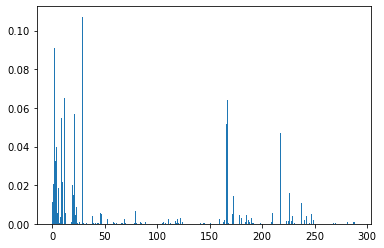

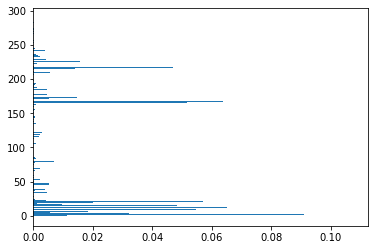

In [33]:
plt.bar(range(len(gb_reg.feature_importances_)), gb_reg.feature_importances_)
plt.show()
plt.barh(range(len(gb_reg.feature_importances_)), gb_reg.feature_importances_)
plt.show()



In [34]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
model.get_booster().get_fscore()

{'f1': 4675,
 'f29': 3333,
 'f12': 3678,
 'f4': 1722,
 'f8': 4333,
 'f22': 1737,
 'f21': 186,
 'f3': 1478,
 'f5': 1636,
 'f9': 3516,
 'f20': 1294,
 'f209': 297,
 'f233': 134,
 'f2': 468,
 'f15': 129,
 'f0': 1468,
 'f10': 1634,
 'f23': 1810,
 'f6': 3021,
 'f173': 74,
 'f229': 95,
 'f225': 114,
 'f19': 187,
 'f162': 190,
 'f217': 130,
 'f16': 143,
 'f172': 142,
 'f216': 90,
 'f194': 80,
 'f108': 71,
 'f13': 154,
 'f53': 288,
 'f178': 125,
 'f166': 83,
 'f190': 144,
 'f117': 199,
 'f237': 166,
 'f46': 54,
 'f118': 166,
 'f274': 302,
 'f180': 113,
 'f61': 184,
 'f236': 336,
 'f228': 287,
 'f38': 58,
 'f163': 28,
 'f17': 289,
 'f187': 202,
 'f37': 75,
 'f268': 144,
 'f256': 108,
 'f272': 216,
 'f144': 70,
 'f273': 233,
 'f167': 58,
 'f138': 66,
 'f47': 143,
 'f266': 79,
 'f214': 35,
 'f75': 142,
 'f267': 145,
 'f122': 32,
 'f152': 85,
 'f193': 72,
 'f159': 81,
 'f200': 25,
 'f124': 149,
 'f33': 110,
 'f141': 28,
 'f111': 63,
 'f24': 111,
 'f275': 43,
 'f160': 133,
 'f7': 87,
 'f56': 21,
 'f

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

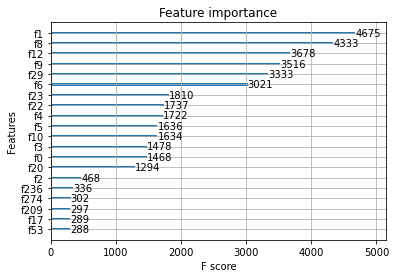

In [36]:
xgb.plot_importance(model.get_booster(),max_num_features=20)

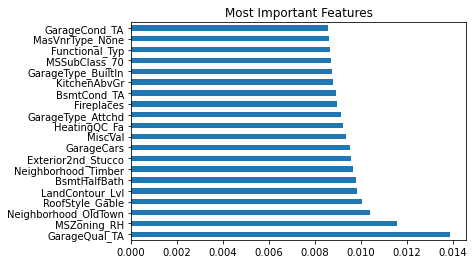

In [38]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title('Most Important Features')
plt.savefig("data /Feature_Importances.png")

In [39]:
#creating predict column and adding it to DF to show actual vs predicted
y_head=pd.DataFrame(y_head,columns=['Predict'])
y_test.reset_index(drop=True,inplace=True)
y_test_y_head=pd.concat([y_test,y_head],axis=1)
y_test_y_head.head()

,SalePrice,Predict
0,11.771444,11.778796
1,11.904974,11.917940
2,11.661785,11.569167
3,12.086732,12.077199
4,12.034697,12.012405


for submission 

In [40]:
prediction= y_test_y_head.to_csv('data /prediction')

OLS scored the highest R Squared accuracy and the second lowest error accuracy as well. 